<a href="https://colab.research.google.com/github/Ercampa2/AulasAprendizadoMaquina/blob/main/redesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [208]:
def activation(x):
  return np.where(x >= 0, 1, 0)

def predict(x, weights, bias):
  z = np.dot(x, weights) + bias
  return activation(z)

def fit(x, y, learning_rate=0.001, epochs=100):
  n_features = x.shape[1]

  #Inicialização
  weights = np.random.rand(n_features)
  bias = 0

  #Percorrer pelas épocas
  for epoch in range(epochs):
    #Percorrer pelos dados 
    for i in range(len(x)):
      z = np.dot(x, weights) + bias #produto escalar e bias
      y_pred = activation(z) #Função de ativação
      loss = (y[i] - y_pred[i]) #Calculo perda

      #Atualização dos pesos com base no erro(perda)
      weights += learning_rate * loss * x[i]
      bias += learning_rate * loss


  #Calculo de performance da epoca
  y_pred = predict(x,weights,bias)
  acc = 1 - np.sum(np.abs(y_pred-y))/len(x)

  acc = accuracy_score(y_pred, y)
  print(f'acc after epcoch {epoch}: {acc}')
  return weights, loss

In [211]:

x = np.array([[0,0,0],
             [0,1,0],
             [1,1,0],
             [1,1,1]])

y = np.array([1,
              0,
              0,
              1])

w,b = fit(x, y, learning_rate=0.001, epochs=500)

pred = predict(x, w, b)

print(pred)

acc after epcoch 499: 0.75
1.0
[1 0 0 1]
[1 1 1 1]


In [ ]:
model = DecisionTreeClassifier()
model.fit(x,y)
print(accuracy_score(model.predict(x), y))
print(model.predict(x))

In [213]:
X = np.array([[7, 9, 7], #23 - 1
              [3, 7, 3], #13 - 0
              [10, 10, 10], #30 - 1             
              [8, 5, 10], #23 - 1
              [4, 5, 7], #16 - 0
              [4, 9, 2], #15 - 0
              [7, 6, 8], #21 - 1
              [3, 5, 5], #13 - 0
              [0,10,10], #20 - 0
              [4,10,10], #24 - 1
              [8,4,9], # 21 - 1
              [10,10,0], # 10 - 0
              [10,3,10]]) # 23 - 1

Y = np.array([1, 
              0, 
              1, 
              1,
              0,
              0,
              1,
              0,
              0,
              1,
              1,
              0,
              1])

W,B = fit(X, Y,
          learning_rate=0.001,
          epochs=100)

List = predict(X,W,B)
print(List)

acc after epcoch 99: 0.7692307692307693
[1 0 1 1 1 0 1 1 0 1 1 0 1]


[Text(0.4, 0.9, 'x[2] <= 6.0\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.7, 'x[0] <= 5.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.4, 0.5, 'x[0] <= 2.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.3, 'x[2] <= 8.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

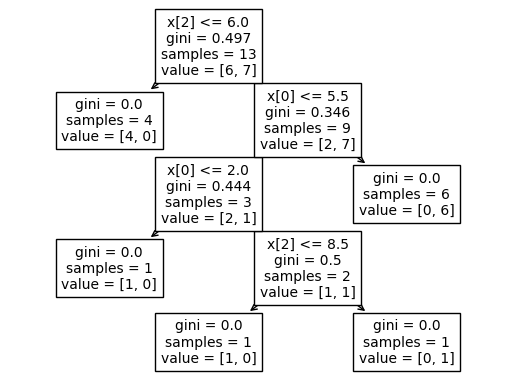

In [216]:
model2 = DecisionTreeClassifier()

#print(model2.predict(X))
#print(accuracy_score(model2.predict(X), Y))
tree.plot_tree(model2.fit(X, Y))

In [193]:
pred = predict([10,8,9],W,B) # 27
print(pred)

pred = predict([9,7,5],W,B) # 21
print(pred)

pred = predict([5,9,7],W,B) # 21
print(pred)

pred = predict([6,6,9],W,B) # 21
print(pred)

pred = predict([4,6,6],W,B) # 16
print(pred)

pred = predict([3,5,7],W,B) # 15
print(pred)

pred = predict([0,10,7],W,B) # 17
print(pred)

pred = predict([8,10,2],W,B) # 20
print(pred)

1
1
1
1
1
1
1
1


In [139]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_iris()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y)


w,b = fit(X_train,y_train,learning_rate=0.001, epochs=100)

y_pred = predict(X_test,w,b)

print(classification_report(y_test,y_pred))




acc after epcoch 99: 0.3303571428571429
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.34      1.00      0.51        13
           2       0.00      0.00      0.00        11

    accuracy                           0.34        38
   macro avg       0.11      0.33      0.17        38
weighted avg       0.12      0.34      0.17        38



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
